<a href="https://colab.research.google.com/github/tao-c/ml_notes/blob/master/Appraoch_any_machine_learning_problem1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
%cd /gdrive

/gdrive


In [ ]:
pwd

'/gdrive'

In [ ]:
ls

'My Drive'/


In [3]:
cd 'My Drive'/

/gdrive/My Drive


In [4]:
cd notes/

/gdrive/My Drive/notes


In [ ]:
!git clone https://github.com/tao-c/scikit-learn/tree/master/doc/tutorial/text_analytics

Cloning into 'text_analytics'...
fatal: repository 'https://github.com/tao-c/scikit-learn/tree/master/doc/tutorial/text_analytics/' not found


In [ ]:
categories = ['alt.atheism', 'soc.religion.christian',
...               'comp.graphics', 'sci.med']

In [ ]:
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train',categories=categories, shuffle=True, random_state=42)

In [ ]:
ls

 ch02.ipynb
'NLP in action.gdoc'
 nlp.ipynb
'PEP 274 -- Dict Comprehensions.gdoc'
 statistics_notes.gdoc
'Text Preprocessing in Python: Steps, Tools, and Examples.ipynb'
'Untitled document.gdoc'
 房东互助：从雷丁恐怖袭击，分析政府房及其区域的危害.gdoc


#The returned dataset is a scikit-learn “bunch”: a simple holder object with fields that can be both accessed as python dict keys or object attributes for convenience, for instance the target_names holds the list of the requested category names:

In [ ]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

#The files themselves are loaded in memory in the data attribute. For reference the filenames are also available:

In [ ]:
len(twenty_train.data)

2257

In [ ]:
len(twenty_train.filenames)

2257

#Let’s print the first lines of the first loaded file:

In [ ]:
print("\n".join(twenty_train.data[0].split("\n")[:3]))

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton


In [ ]:
print("\n".join(twenty_train.data[2].split("\n")[:10]))

From: djohnson@cs.ucsd.edu (Darin Johnson)
Subject: Re: harrassed at work, could use some prayers
Organization: =CSE Dept., U.C. San Diego
Lines: 63

(Well, I'll email also, but this may apply to other people, so
I'll post also.)

>I've been working at this company for eight years in various
>engineering jobs.  I'm female.  Yesterday I counted and realized that


In [ ]:
print(twenty_train.target_names[twenty_train.target[0]]),print(twenty_train.target_names[twenty_train.target[2]])

comp.graphics
soc.religion.christian


(None, None)

In [ ]:
print(twenty_train.target_names[twenty_train.target[2]])

soc.religion.christian


#Supervised learning algorithms will require a category label for each document in the training set. In this case the category is the name of the newsgroup which also happens to be the name of the folder holding the individual documents.

#For speed and space efficiency reasons scikit-learn loads the target attribute as an array of integers that corresponds to the index of the category name in the target_names list. The category integer id of each sample is stored in the target attribute:

In [ ]:
twenty_train.target[:10]

array([1, 1, 3, 3, 3, 3, 3, 2, 2, 2])

#It is possible to get back the category names as follows:

In [ ]:
for t in twenty_train.target[:10]:
...     print(twenty_train.target_names[t])

comp.graphics
comp.graphics
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
sci.med
sci.med
sci.med


In [ ]:
type(twenty_train.data)

list

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape

(2257, 35788)

#CountVectorizer supports counts of N-grams of words or consecutive characters. Once fitted, the vectorizer has built a dictionary of feature indices:

In [ ]:
count_vect.vocabulary_.get(u'algorithm')

4690

In [ ]:
count_vect.vocabulary_['algorithm']

4690

#The index value of a word in the vocabulary is linked to its frequency in the whole training corpus.

In [ ]:
len(count_vect.vocabulary_)

35788

In [ ]:
for word, frequency in count_vect.vocabulary_.items():  # for name, age in dictionary.iteritems():  (for Python 2.x)
    if frequency == 1:
        print(word, frequency)

000 1


In [ ]:
for i in range(10):
  print(f"=========== Frequency {i} =============")
  for word, frequency in count_vect.vocabulary_.items():  # for name, age in dictionary.iteritems():  (for Python 2.x)
    if frequency == 1:
        print(word, frequency)

=========== Frequency 0 =============
000 1
=========== Frequency 1 =============
000 1
=========== Frequency 2 =============
000 1
=========== Frequency 3 =============
000 1
=========== Frequency 4 =============
000 1
=========== Frequency 5 =============
000 1
=========== Frequency 6 =============
000 1
=========== Frequency 7 =============
000 1
=========== Frequency 8 =============
000 1
=========== Frequency 9 =============
000 1


In [ ]:
for i in range(10):
  print(f"=========== Frequency {i} =============")
  for word, frequency in count_vect.vocabulary_.items():  # for name, age in dictionary.iteritems():  (for Python 2.x)
    if frequency == i:
        print(word, frequency)

=========== Frequency 0 =============
00 0
=========== Frequency 1 =============
000 1
=========== Frequency 2 =============
0000 2
=========== Frequency 3 =============
0000001200 3
=========== Frequency 4 =============
000005102000 4
=========== Frequency 5 =============
0001 5
=========== Frequency 6 =============
000100255pixel 6
=========== Frequency 7 =============
00014 7
=========== Frequency 8 =============
000406 8
=========== Frequency 9 =============
0007 9


In [ ]:
for i in range(10):
  print(f"=========== Frequency {i+50} =============")
  for word, frequency in count_vect.vocabulary_.items():  # for name, age in dictionary.iteritems():  (for Python 2.x)
    if frequency == i+50:
        print(word, frequency)

=========== Frequency 50 =============
0131 50
=========== Frequency 51 =============
013423tan102 51
=========== Frequency 52 =============
013657 52
=========== Frequency 53 =============
0138 53
=========== Frequency 54 =============
013846 54
=========== Frequency 55 =============
0150 55
=========== Frequency 56 =============
015518 56
=========== Frequency 57 =============
01580 57
=========== Frequency 58 =============
015931 58
=========== Frequency 59 =============
01720 59


In [ ]:
for i in range(10):
  print(f"=========== Frequency {i+4690} =============")
  for word, frequency in count_vect.vocabulary_.items():  # for name, age in dictionary.iteritems():  (for Python 2.x)
    if frequency == i+4690:
        print(word, frequency)

=========== Frequency 4690 =============
algorithm 4690
=========== Frequency 4691 =============
algorithmic 4691
=========== Frequency 4692 =============
algorithmically 4692
=========== Frequency 4693 =============
algorithms 4693
=========== Frequency 4694 =============
algoritmic 4694
=========== Frequency 4695 =============
ali 4695
=========== Frequency 4696 =============
alia 4696
=========== Frequency 4697 =============
alias 4697
=========== Frequency 4698 =============
aliased 4698
=========== Frequency 4699 =============
aliases 4699


In [ ]:
type(X_train_counts)

scipy.sparse.csr.csr_matrix

In [ ]:
X_train_counts[1]

<1x35788 sparse matrix of type '<class 'numpy.int64'>'
	with 102 stored elements in Compressed Sparse Row format>

In [ ]:
X_train_counts.toarray

<bound method _cs_matrix.toarray of <2257x35788 sparse matrix of type '<class 'numpy.int64'>'
	with 365886 stored elements in Compressed Sparse Row format>>

In [ ]:
X_train_counts.toarray()



array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(2257, 35788)

In [ ]:
X_train_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, twenty_train.target)

In [ ]:
docs_new = ['God is love', 'OpenGL on the GPU is fast']
X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = clf.predict(X_new_tfidf)

In [ ]:
for doc, category in zip(docs_new, predicted):
...     print('%r => %s' % (doc, twenty_train.target_names[category]))

'God is love' => soc.religion.christian
'OpenGL on the GPU is fast' => comp.graphics


In [ ]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', MultinomialNB()),
 ])

In [ ]:
text_clf

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
text_clf.fit(twenty_train.data, twenty_train.target)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
import numpy as np
twenty_test = fetch_20newsgroups(subset='test',
     categories=categories, shuffle=True, random_state=42)
docs_test = twenty_test.data
predicted = text_clf.predict(docs_test)
np.mean(predicted == twenty_test.target)

0.8348868175765646

In [ ]:
from sklearn.linear_model import SGDClassifier
text_clf = Pipeline([
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', SGDClassifier(loss='hinge', penalty='l2',
                           alpha=1e-3, random_state=42,
                           max_iter=5, tol=None)),
 ])

text_clf.fit(twenty_train.data, twenty_train.target)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                ('clf',
                 SGDClassifier(alpha=0.001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                      

In [ ]:
predicted = text_clf.predict(docs_test)
np.mean(predicted == twenty_test.target)

0.9101198402130493

In [ ]:
from sklearn import metrics
print(metrics.classification_report(twenty_test.target, predicted,
    target_names=twenty_test.target_names))

                        precision    recall  f1-score   support

           alt.atheism       0.95      0.80      0.87       319
         comp.graphics       0.87      0.98      0.92       389
               sci.med       0.94      0.89      0.91       396
soc.religion.christian       0.90      0.95      0.93       398

              accuracy                           0.91      1502
             macro avg       0.91      0.91      0.91      1502
          weighted avg       0.91      0.91      0.91      1502



#There is a red winequality dataset2 which is quite famous. This dataset has 11 different attributes that decide the quality of red wine

In [ ]:
import pandas as pd
df = pd.read_csv("winequality-red.csv")

In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


#We can treat this problem either as a classification problem or as a regression problem since wine quality is nothing but a real number between 0 and 10. For simplicity, let’s choose classification. This dataset, however, consists of only six types of quality values. We will thus map all quality values from 0 to 5.

In [ ]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
# a mapping dictionary that maps the quality values from 0 to 5
quality_mapping = {
3: 0,
4: 1,
5: 2,
6: 3,
7: 4,
8: 5
}
# you can use the map function of pandas with
# any dictionary to convert the values in a given
# column to values in the dictionary
df.loc[:, "quality"] = df.quality.map(quality_mapping)

In [ ]:
df.quality.value_counts()

2    681
3    638
4    199
1     53
5     18
0     10
Name: quality, dtype: int64

#Before we begin to understand what overfitting is, let’s divide the data into two parts. This dataset has 1599 samples. We keep 1000 samples for training and 599 as a separate set.
#Splitting can be done easily by the following chunk of code:


In [ ]:
# use sample with frac=1 to shuffle the dataframe
# we reset the indices since they change after
# shuffling the dataframe
df = df.sample(frac=1).reset_index(drop=True)
# top 1000 rows are selected
# for training
df_train = df.head(1000)
# bottom 599 values are selected
# for testing/validation
df_test = df.tail(599)

In [ ]:
df_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.1,0.470,0.00,2.20,0.067,7.0,14.0,0.99517,3.40,0.58,10.9,1
1,7.7,0.580,0.01,1.80,0.088,12.0,18.0,0.99568,3.32,0.56,10.5,4
2,8.3,0.490,0.36,1.80,0.222,6.0,16.0,0.99800,3.18,0.60,9.5,3
3,7.1,0.590,0.01,2.30,0.080,27.0,43.0,0.99550,3.42,0.58,10.7,3
4,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,0


#We will now train a decision tree model on the training set. For the decision tree model, I am going to use scikit-learn.

In [ ]:
# import from scikit-learn
from sklearn import tree
from sklearn import metrics
# initialize decision tree classifier class
# with a max_depth of 3
clf = tree.DecisionTreeClassifier(max_depth=3)
# choose the columns you want to train on
# these are the features for the model
cols = ['fixed acidity',
'volatile acidity',
'citric acid','residual sugar',
'chlorides',
'free sulfur dioxide',
'total sulfur dioxide',
'density',
'pH',
'sulphates',
'alcohol']
# train the model on the provided features
# and mapped quality from before
clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#Note that I have used a max_depth of 3 for the decision tree classifier. I have left all other parameters of this model to its default value.
#Now, we test the accuracy of this model on the training set and the test set:

In [ ]:
# generate predictions on the training set
train_predictions = clf.predict(df_train[cols])
# generate predictions on the test set
test_predictions = clf.predict(df_test[cols])
# calculate the accuracy of predictions on
# training data set
train_accuracy = metrics.accuracy_score(
df_train.quality, train_predictions
)
# calculate the accuracy of predictions on
# test data set
test_accuracy = metrics.accuracy_score(
df_test.quality, test_predictions
)

In [ ]:
train_accuracy,test_accuracy

(0.592, 0.5425709515859767)

#The training and test accuracies are found to be 58.9% and 54.25%. Now we increase the max_depth to 7 and repeat the process. This gives training accuracy of 76.6% and test accuracy of 57.3%. 
#Here, we have used accuracy, mainly because it is the most straightforward metric. It might not be the best metric for this problem.
#What about we calculate these accuracies for different values of max_depth and make a plot?

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


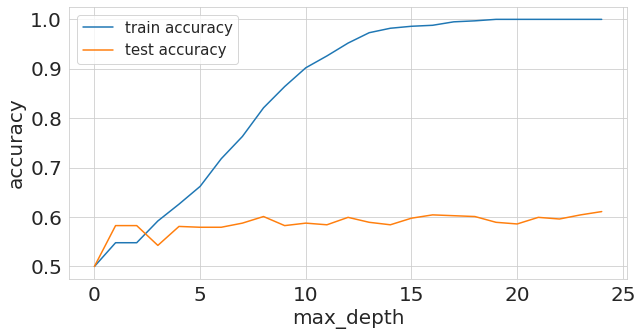

In [ ]:
# NOTE: this code is written in a jupyter notebook
# import scikit-learn tree and metrics
from sklearn import tree
from sklearn import metrics
# import matplotlib and seaborn
# for plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# this is our global size of label text
# on the plots
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
# This line ensures that the plot is displayed
# inside the notebook
%matplotlib inline
# initialize lists to store accuracies
# for training and test data
# we start with 50% accuracy
train_accuracies = [0.5]
test_accuracies = [0.5]
# iterate over a few depth values
for depth in range(1, 25):
# init the model
  clf = tree.DecisionTreeClassifier(max_depth=depth)
  # columns/features for training
  # note that, this can be done outside
  # the loop
  cols = [
  'fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates','alcohol'
  ]
  # fit the model on given features
  clf.fit(df_train[cols], df_train.quality)
  # create training & test predictions
  train_predictions = clf.predict(df_train[cols])
  test_predictions = clf.predict(df_test[cols])
  # calculate training & test accuracies
  train_accuracy = metrics.accuracy_score(
  df_train.quality, train_predictions
  )
  test_accuracy = metrics.accuracy_score(
  df_test.quality, test_predictions
  )
  # append accuracies
  train_accuracies.append(train_accuracy)
  test_accuracies.append(test_accuracy)
# create two plots using matplotlib
# and seaborn
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

In [ ]:
[depth for depth in range(1, 25)]

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

#We see that the best score for test data is obtained when max_depth has a value of 14(not, should be 24). 
#From max_depth from 1 to 24, as we keep increasing the value of this parameter, test accuracy remains the same or gets worse, but the training accuracy keeps increasing. It means that our simple decision tree model keeps learning about the training data better and better with an increase in max_depth, but the performance on test data does not improve at all.

#This is called overfitting.
## The model fits perfectly on the training set and performs poorly when it comes to the test set. This means that the model will learn the training data well but will not generalize on unseen samples. In the dataset above, one can build a model with very high max_depth which will have outstanding results on training data, but that kind of model is not useful as it will not provide a similar result on the real-world samples or live data.

#One might argue that this approach isn’t overfitting as the accuracy of the test set more or less remains the same. Another definition of overfitting would be when the
test loss increases as we keep improving training loss. This is very common when
it comes to neural networks.
Whenever we train a neural network, we must monitor loss during the training time
for both training and test set. If we have a very large network for a dataset which is
quite small (i.e. very less number of samples), we will observe that the loss for both
training and test set will decrease as we keep training. However, at some point, test
loss will reach its minima, and after that, it will start increasing even though training
loss decreases further. We must stop training where the validation loss reaches its
minimum value.
This is the most common explanation of overfitting.

In [ ]:
test_accuracies.index(max(test_accuracies))

24

In [ ]:
test_accuracies[24],test_accuracies[15]

(0.6110183639398998, 0.5976627712854758)

In [ ]:
df_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.1,0.470,0.00,2.20,0.067,7.0,14.0,0.99517,3.40,0.58,10.9,1
1,7.7,0.580,0.01,1.80,0.088,12.0,18.0,0.99568,3.32,0.56,10.5,4
2,8.3,0.490,0.36,1.80,0.222,6.0,16.0,0.99800,3.18,0.60,9.5,3
3,7.1,0.590,0.01,2.30,0.080,27.0,43.0,0.99550,3.42,0.58,10.7,3
4,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,0


In [ ]:
pwd

'/gdrive/My Drive/notes'

In [ ]:
df_train.to_csv("train.csv",index=False)

#We can split any data into k-equal parts using KFold from scikit-learn. Each sample is assigned a value from 0 to k-1 when using k-fold cross validation.

In [ ]:
# import pandas and model_selection module of scikit-learn
import pandas as pd
from sklearn import model_selection
if __name__ == "__main__":
  # Training data is in a CSV file called train.csv
  df = pd.read_csv("train.csv")
  # we create a new column called kfold and fill it with -1
  df["kfold"] = -1
  # the next step is to randomize the rows of the data
  df = df.sample(frac=1).reset_index(drop=True)
  # initiate the kfold class from model_selection module
  kf = model_selection.KFold(n_splits=5)
  # fill the new kfold column
  for fold, (trn_, val_) in enumerate(kf.split(X=df)):
    df.loc[val_, 'kfold'] = fold
    # save the new csv with kfold column
    df.to_csv("train_folds.csv", index=False)

In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,6.5,0.530,0.06,2.0,0.063,29.0,44.0,0.99489,3.38,0.83,10.3,3,0
1,8.8,0.590,0.18,2.9,0.089,12.0,74.0,0.99738,3.14,0.54,9.4,2,0
2,6.8,0.490,0.22,2.3,0.071,13.0,24.0,0.99438,3.41,0.83,11.3,3,0
3,10.0,0.430,0.33,2.7,0.095,28.0,89.0,0.99840,3.22,0.68,10.0,2,0
4,6.6,0.840,0.03,2.3,0.059,32.0,48.0,0.99520,3.52,0.56,12.3,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9.5,0.460,0.24,2.7,0.092,14.0,44.0,0.99800,3.12,0.74,10.0,3,4
996,8.3,0.430,0.30,3.4,0.079,7.0,34.0,0.99788,3.36,0.61,10.5,2,4
997,11.4,0.625,0.66,6.2,0.088,6.0,24.0,0.99880,3.11,0.99,13.3,3,4
998,7.7,0.835,0.00,2.6,0.081,6.0,14.0,0.99750,3.30,0.52,9.3,2,4


In [ ]:
df.kfold.value_counts()

4    200
3    200
2    200
1    200
0    200
Name: kfold, dtype: int64

#You can use this process with almost all kinds of datasets. For example, when you have images, you can create a CSV with image id, image location and image labeland use the process above.

#Stratified k-fold cross-validation keeps the ratio of labels in each fold constant. So,in each fold, you will have the same 90% positive and 10% negative samples. Thus,whatever metric you choose to evaluate, it will give similar results across all folds.

#It’s easy to modify the code for creating k-fold cross-validation to create stratified k-folds. We are only changing from model_selection.KFold to model_selection.StratifiedKFold and in the kf.split(...) function, we specify the target column on which we want to stratify. We assume that our CSV dataset has a column called “target” and it is a classification problem!

In [ ]:
# import pandas and model_selection module of scikit-learn
import pandas as pd
from sklearn import model_selection
if __name__ == "__main__":
  # Training data is in a csv file called train.csv
  df = pd.read_csv("train.csv")
  # we create a new column called kfold and fill it with -1
  df["kfold"] = -1
  # the next step is to randomize the rows of the data
  df = df.sample(frac=1).reset_index(drop=True)
  # fetch targets
  y = df.quality.values
  # initiate the kfold class from model_selection module
  kf = model_selection.StratifiedKFold(n_splits=5)
  # fill the new kfold column
  for f, (t_, v_) in enumerate(kf.split(X=df, y=y)):
    df.loc[v_, 'kfold'] = f
    # save the new csv with kfold column
    df.to_csv("train_folds.csv", index=False)

#For the wine dataset, let’s look at the distribution of labels.
═

Text(0, 0.5, 'count')

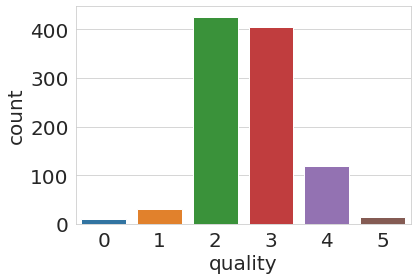

In [ ]:
b = sns.countplot(x='quality', data=df)
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)

#Note that we continue on the code above. So, we have converted the target values.
#Looking at figure 6 we can say that the quality is very much skewed. Some classes have a lot of samples, and some don’t have that many. If we do a simple k-fold, we won’t have an equal distribution of targets in every fold. Thus, we choose stratified k-fold in this case.

#The rule is simple. If it’s a  standard classification problem, choose stratified k-fold  blindly. 

 

#But  what  should  we  do  if  we  have  a  large  amount  of  data?  Suppose  we  have  1 million samples. A 5 fold cross-validation would mean training on 800k samples and validating on 200k. Depending on which algorithm we choose, training and even validation can be very expensive for a dataset which is of this size. In these cases, we can opt for a hold-out based validation. 

 

#The process for creating the hold-out remains the same as stratified k-fold. For a dataset which has 1 million samples, we can create ten folds instead of 5 and keep one of those folds as hold-out. This means we will have 100k samples in the hold-out, and we will always calculate loss, accuracy and other metrics on this set and train on 900k samples.

#Hold-out  is  also  used  very  frequently  with  time-series  data.  Let’s  assume  the problem we are provided with is predicting sales of a store for 2020, and you are provided all the data from 2015-2019. In this case, you can select all the data for 2019 as a hold-out and train your model on all the data from 2015 to 2018.

#In many cases, we have to deal with small datasets and creating big validation sets means losing a lot of data for the model to learn. In those cases, we can opt for a  type of k-fold cross-validation where k=N, where N is the number of samples in the dataset.  This  means  that  in  all  folds  of  training,  we  will  be  training  on  all  data samples except 1. The number of folds for this type of cross-validation is the same as the number of samples that we have in the dataset.  

 
#One should note that this type of cross-validation can be costly in terms of the time it takes if the model is not fast enough, but since it’s only preferable to use this cross-validation for small datasets, it doesn’t matter much.

#Now we can move to regression. The good thing about regression problems is that
we can use all the cross-validation techniques mentioned above for regression
problems except for stratified k-fold. That is we cannot use stratified k-fold directly,
but there are ways to change the problem a bit so that we can use stratified k-fold
for regression problems. Mostly, simple k-fold cross-validation works for any
regression problem. However, if you see that the distribution of targets is not
consistent, you can use stratified k-fold.

#To use stratified k-fold for a regression problem, we have first to divide the target
into bins, and then we can use stratified k-fold in the same way as for classification
problems. There are several choices for selecting the appropriate number of bins. If
you have a lot of samples( > 10k, > 100k), then you don’t need to care about the
number of bins. Just divide the data into 10 or 20 bins. If you do not have a lot of
samples, you can use a simple rule like Sturge’s Rule to calculate the appropriate
number of bins.
Sturge’s rule:
Number of Bins = 1 + log2(N)
Where N is the number of samples you have in your dataset. This function is plotted
in Figure 8.
Figure

#Let’s make a sample regression dataset and try to apply stratified k-fold as shown
in the following python snippet.

In [ ]:
# stratified-kfold for regression
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import model_selection

def create_folds(data):
  # we create a new column called kfold and fill it with -1
  data["kfold"] = -1
  # the next step is to randomize the rows of the data
  data = data.sample(frac=1).reset_index(drop=True)
  # calculate the number of bins by Sturge's rule
  # I take the floor of the value, you can also
  # just round it
  num_bins = np.floor(1 + np.log2(len(data)))
  # bin targets
  data.loc[:, "bins"] = pd.cut(
  data["target"], bins=num_bins, labels=False
  )
  # initiate the kfold class from model_selection module
  kf = model_selection.StratifiedKFold(n_splits=5)
  # fill the new kfold column
  # note that, instead of targets, we use bins!
  for f, (t_, v_) in enumerate(kf.split(X=data, y=data.bins.values)):
    data.loc[v_, 'kfold'] = f
    # drop the bins column
    data = data.drop("bins", axis=1)
  # return dataframe with folds
  return data
if __name__ == "__main__":
  # we create a sample dataset with 15000 samples
  # and 100 features and 1 target
  X, y = datasets.make_regression(
  n_samples=15000, n_features=100, n_targets=1
  )
  # create a dataframe out of our numpy arrays
  df = pd.DataFrame(
  X,
  columns=[f"f_{i}" for i in range(X.shape[1])]
  )
  df.loc[:, "target"] = y
  # create folds
  df = create_folds(df)

In [ ]:
from sklearn import datasets
# we create a sample dataset with 15000 samples
# and 100 features and 1 target
X, y = datasets.make_regression(
  n_samples=15000, n_features=100, n_targets=1
  )
  # create a dataframe out of our numpy arrays
df = pd.DataFrame(
  X,
  columns=[f"f_{i}" for i in range(X.shape[1])]
  )
df.loc[:, "target"] = np.array(y)

In [ ]:
df

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,...,f_61,f_62,f_63,f_64,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,f_80,f_81,f_82,f_83,f_84,f_85,f_86,f_87,f_88,f_89,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,target
0,1.464094,0.709491,-2.054099,-0.944574,0.870449,0.090552,0.895403,1.275740,-0.209319,0.952506,1.552691,-0.354468,1.632768,-2.154695,0.379040,-0.063702,-0.302846,-0.327819,-0.624518,-0.598670,-0.722252,0.221149,-0.991672,-0.712171,-0.465023,1.373615,-0.802585,-0.293797,-1.422767,1.814149,-1.075575,0.090813,1.098624,-1.088580,-0.150711,0.709782,-0.045016,-0.530930,-0.555162,-0.318084,...,0.004090,-1.061833,-0.357245,-0.134812,-0.757400,-1.091686,0.155185,-0.793564,-0.359673,1.314810,0.369728,0.262699,2.198443,-0.992477,0.161088,-0.094004,-0.397900,0.142740,-0.595191,-1.258696,-0.222823,0.064831,-1.217372,0.685363,-0.731132,-0.123965,-1.007446,0.286478,-1.198299,-0.325732,1.060370,1.395708,-0.656979,0.496657,-0.707222,1.131116,0.262702,-0.364065,-1.883873,-122.301333
1,0.048285,0.493355,0.502420,0.793302,-0.473695,-1.444286,-2.251987,-0.564807,-0.604647,0.653389,0.666112,0.066359,0.588879,-1.543148,-0.444312,1.233920,0.572427,-0.210645,2.080004,-0.637511,-0.079178,1.750777,-0.883928,1.340708,1.562441,1.632206,-0.765785,-2.006947,1.051170,1.132981,0.115894,-0.064618,-0.254337,-2.349168,-0.030532,3.113260,-0.536025,-0.896544,0.799158,0.255625,...,1.343337,1.838339,-1.078754,-1.398824,1.955873,0.956246,1.151652,0.297026,1.239645,-1.540468,0.308906,-0.431609,-0.300472,-0.451161,-0.659919,0.469477,0.062033,-1.659795,-1.874371,0.913445,-0.808320,1.732371,0.043591,0.566802,0.068453,-0.095018,0.465620,0.012577,-0.263639,-0.228348,0.091919,-1.073425,-0.779322,0.282733,-0.568742,1.268473,-0.290083,1.091785,-1.550019,176.153125
2,-0.391104,0.681290,0.490506,0.676052,0.402841,-0.016840,-0.917892,-0.167514,1.347119,0.816968,1.393229,0.017734,2.651090,-1.365601,1.187361,-0.674484,-0.687129,-0.464736,0.749492,1.249619,-0.067370,-0.071682,-0.485829,1.800882,0.614962,0.403652,1.808181,0.786147,-0.286649,-0.901450,0.116837,1.706143,-1.309684,-0.094999,0.613604,-0.564455,-0.971979,0.423302,-1.088586,0.462172,...,-2.148162,0.570216,0.503088,-0.302073,-0.546844,0.229679,0.193383,1.070814,3.000255,-1.034228,0.758716,1.535114,1.564546,-1.404508,-0.032718,0.961480,0.925260,0.363097,-0.670305,0.375398,2.219655,-1.267025,-0.562530,-0.410211,-1.417569,-1.036486,-0.055885,0.207085,1.192735,0.019331,1.981386,1.144589,0.381848,1.294177,0.369602,-1.487163,0.804857,0.903420,1.499470,-68.065152
3,-0.719885,-0.889897,0.058613,-0.399093,0.753669,-0.199855,-1.008447,-1.744641,0.181095,-0.075441,1.096473,0.782867,-0.627074,0.523761,0.073936,0.151389,-0.470097,-1.733421,-1.317414,0.081911,0.675981,-1.398310,-1.002599,-1.204504,1.559354,-0.591018,2.297427,0.040422,-1.336666,-0.378264,-0.020471,-1.305801,0.804193,-0.082371,0.175748,-0.517907,0.966972,-0.822497,-0.223144,-0.969422,...,-0.587095,-1.051829,0.548410,-0.694777,0.687213,0.771571,0.566063,-0.494580,-1.410308,0.001335,0.427368,-0.747377,0.129508,-0.688339,1.581951,0.717288,-1.581983,-1.712351,0.359528,-0.731421,0.288311,0.672756,-0.467097,-0.549905,0.316208,0.178741,1.396324,0.801009,-1.617191,0.142715,0.056705,-0.182896,-0.528584,-0.725880,0.442389,0.970580,1.654307,1.044164,-1.362483,-71.334371
4,-1.144181,-0.319032,0.348945,-0.114184,-0.682886,0.250030,-0.488626,1.250046,1.375095,1.010553,0.292285,-0.094708,-1.210721,-2.189818,-0.212161,0.580827,0.353397,0.668362,0.252390,0.550159,-1.228381,-0.339964,1.141003,1.684626,1.369355,-1.052544,0.864944,0.468058,0.266212,-0.552052,1.045455,-1.391131,-1.672114,-1.027490,0.425736,0.358787,0.723373,0.244412,0.278188,-0.102053,...,-1.069598,0.761401,-0.302439,-1.089970,-0.874629,-0.221619,-0.138332,-1.484082,-0.563871,0.143567,0.167575,0.417327,0.445875,-0.818144,0.035537,-0.932

In [ ]:
import numpy as np
data = df.copy()
data = data.sample(frac=1).reset_index(drop=True)
  # calculate the number of bins by Sturge's rule
  # I take the floor of the value, you can also
  # just round it
num_bins = np.floor(1 + np.log2(len(data)))
 

In [ ]:
np.log2(len(data)),np.floor(1 + np.log2(len(data)))

(13.872674880270605, 14.0)

In [ ]:
data["target"]

0        -12.633692
1        -77.060051
2       -103.868103
3         33.073009
4        110.247254
            ...    
14995    -88.733920
14996    -64.968666
14997     81.333266
14998   -187.129530
14999    -73.433552
Name: target, Length: 15000, dtype: float64

In [ ]:
pd.cut()

In [ ]:
pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3)

[(0.994, 3.0], (5.0, 7.0], (3.0, 5.0], (3.0, 5.0], (5.0, 7.0], (0.994, 3.0]]
Categories (3, interval[float64]): [(0.994, 3.0] < (3.0, 5.0] < (5.0, 7.0]]

In [ ]:
pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3,labels=False)

array([0, 2, 1, 1, 2, 0])

In [ ]:
pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3) ... # doctest: +ELLIPSIS [(0.994, 3.0], (5.0, 7.0], (3.0, 5.0], (3.0, 5.0], (5.0, 7.0], ... Categories (3, interval[float64]): [(0.994, 3.0] < (3.0, 5.0] ...

pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3, retbins=True) ... # doctest: +ELLIPSIS ([(0.994, 3.0], (5.0, 7.0], (3.0, 5.0], (3.0, 5.0], (5.0, 7.0], ... Categories (3, interval[float64]): [(0.994, 3.0] < (3.0, 5.0] ... array([0.994, 3. , 5. , 7. ]))

In [ ]:
pd.cut()

In [ ]:
pd.cut(data["target"], bins=num_bins, labels=False)

TypeError: ignored

In [ ]:
 # bin targets
data.loc[:, "bins"] = pd.cut(data["target"], bins=num_bins, labels=False)

TypeError: ignored

#Cross-validation is the first and most essential step when it comes to building
machine learning models. If you want to do feature engineering, split your data first.
If you're going to build models, split your data first. If you have a good crossvalidation
scheme in which validation data is representative of training and realworld
data, you will be able to build a good machine learning model which is highly
generalizable.

#The types of cross-validation presented in this chapter can be applied to almost any
machine learning problem. Still, you must keep in mind that cross-validation also
depends a lot on the data and you might need to adopt new forms of cross-validation
depending on your problem and data.
#For example, let’s say we have a problem in which we would like to build a model to detect skin cancer from skin images of patients. Our task is to build a binary classifier which takes an input image and predicts the probability for it being benign or malignant.
#In these kinds of datasets, you might have multiple images for the same patient in
the training dataset. So, to build a good cross-validation system here, you must have
stratified k-folds, but you must also make sure that patients in training data do not
appear in validation data. Fortunately, scikit-learn offers a type of cross-validation
known as GroupKFold. Here the patients can be considered as groups. But
unfortunately, there is no way to combine GroupKFold with StratifiedKFold in
scikit-learn. So you need to do that yourself. I’ll leave it as an exercise for the reader.

#Evaluation metrics
#Knowing about how the aforementioned metrics work is not the only thing we have to understand. We must also know when to use which metrics, and that depends on what kind of data and targets you have. I think it’s more about the targets and less about the data.

In [5]:
pwd

'/gdrive/My Drive/notes'

#When we have an equal number of positive and negative samples in a binary
classification metric, we generally use accuracy, precision, recall and f1.
#Accuracy: It is one of the most straightforward metrics used in machine learning.
#It defines how accurate your model is. For the problem described above, if you build
a model that classifies 90 images accurately, your accuracy is 90% or 0.90. If only
83 images are classified correctly, the accuracy of your model is 83% or 0.83.
Simple.
#Python code for calculating accuracy is also quite simple.

In [7]:
def accuracy(y_true, y_pred):
  """
  Function to calculate accuracy
  :param y_true: list of true values
  :param y_pred: list of predicted values
  :return: accuracy score
  """
  # initialize a simple counter for correct predictions
  correct_counter = 0
  # loop over all elements of y_true
  # and y_pred "together"
  for yt, yp in zip(y_true, y_pred):
    if yt == yp:
      # if prediction is equal to truth, increase the counter
      correct_counter += 1
  # return accuracy
  # which is correct predictions over the number of samples
  return correct_counter / len(y_true)

#We can also calculate accuracy using scikit-learn.

In [8]:
from sklearn import metrics
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]
metrics.accuracy_score(l1, l2)

0.625

In [9]:
accuracy(l1, l2)

0.625

#Now, let’s say we change the dataset a bit such that there are 180 chest x-ray images which do not have pneumothorax and only 20 with pneumothorax. Even in this case, we will create the training and validation sets with the same ratio of positive to negative (pneumothorax to non- pneumothorax) targets. In each set, we have 90 non- pneumothorax and 10 pneumothorax images. If you say that all images in the validation set are non-pneumothorax, what would your accuracy be? Let’s see; you classified 90% of the images correctly. So, your accuracy is 90%.
#But look at it one more time.
#You didn’t even build a model and got an accuracy of 90%. That seems kind of useless. If we look carefully, we will see that the dataset is skewed, i.e., the number of samples in one class outnumber the number of samples in other class by a lot. In these kinds of cases, it is not advisable to use accuracy as an evaluation metric as it is not representative of the data. So, you might get high accuracy, but your model will probably not perform that well when it comes to real-world samples, and you won’t be able to explain to your managers why.

#In these cases, it’s better to look at other metrics such as precision.
#Before learning about precision, we need to know a few terms. Here we have
assumed that chest x-ray images with pneumothorax are positive class (1) and
without pneumothorax are negative class (0).
#True positive (TP): Given an image, if your model predicts the image has
pneumothorax, and the actual target for that image has pneumothorax, it is
considered a true positive.
#True negative (TN): Given an image, if your model predicts that the image does not
have pneumothorax and the actual target says that it is a non-pneumothorax image,
it is considered a true negative.
#In simple words, if your model correctly predicts positive class, it is true positive, and if your model accurately predicts negative class, it is a true negative.

#False positive (FP): Given an image, if your model predicts pneumothorax and the actual target for that image is non- pneumothorax, it a false positive.


#False negative (FN): Given an image, if your model predicts non-pneumothorax
and the actual target for that image is pneumothorax, it is a false negative.
#In simple words, if your model incorrectly (or falsely) predicts positive class, it is a false positive. If your model incorrectly (or falsely) predicts negative class, it is a false negative.
#Let’s look at implementations of these, one at a time.

In [12]:
def true_positive(y_true, y_pred):
  """
  Function to calculate True Positives
  :param y_true: list of true values
  :param y_pred: list of predicted values
  :return: number of true positives
  """
  # initialize
  tp = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == 1 and yp == 1:
      tp += 1
  return tp

def true_negative(y_true, y_pred):
  """
  Function to calculate True Negatives
  :param y_true: list of true values
  :param y_pred: list of predicted values
  :return: number of true negatives
  """
  # initialize
  tn = 0
  for yt, yp in zip(y_true, y_pred):
      if yt == 0 and yp == 0:
        tn += 1
  return tn

def false_positive(y_true, y_pred):
  """
  Function to calculate False Positives
  :param y_true: list of true values
  :param y_pred: list of predicted values
  :return: number of false positives
  """
  # initialize
  35
  fp = 0
  for yt, yp in zip(y_true, y_pred):
      if yt == 0 and yp == 1:
        fp += 1
  return fp

def false_negative(y_true, y_pred):
  """
  Function to calculate False Negatives
  :param y_true: list of true values
  :param y_pred: list of predicted values
  :return: number of false negatives
  """
  # initialize
  fn = 0
  for yt, yp in zip(y_true, y_pred):
      if yt == 1 and yp == 0:
        fn += 1
  return fn

#The way I have implemented these here is quite simple and works only for binary classification. Let’s check these functions.

In [13]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]

In [14]:
true_positive(l1, l2)

2

In [15]:
false_positive(l1, l2)

1

In [16]:
false_negative(l1, l2)

2

In [17]:
true_negative(l1, l2)

3

#If we have to define accuracy using the terms described above, we can write:
#Accuracy Score = (TP + TN) / (TP + TN + FP + FN)

#We can now quickly implement accuracy score using TP, TN, FP and FN in python.
#Let’s call it accuracy_v2.

In [18]:
def accuracy_v2(y_true, y_pred):
  """
  Function to calculate accuracy using tp/tn/fp/fn
  :param y_true: list of true values
  :param y_pred: list of predicted values
  :return: accuracy score
  """
  tp = true_positive(y_true, y_pred)
  fp = false_positive(y_true, y_pred)
  fn = false_negative(y_true, y_pred)
  tn = true_negative(y_true, y_pred)
  accuracy_score = (tp + tn) / (tp + tn + fp + fn)
  return accuracy_score

In [20]:
accuracy(l1, l2),accuracy_v2(l1,l2),metrics.accuracy_score(l1, l2)


(0.625, 0.625, 0.625)

#Impliment other metrics
#Precison = TP/(TP+FP)

In [21]:
def precision(y_true, y_pred):
  """
  Function to calculate precision
  :param y_true: list of true values
  :param y_pred: list of predicted values
  :return: precision score
  """
  tp = true_positive(y_true, y_pred)
  fp = false_positive(y_true, y_pred)
  precision = tp / (tp + fp)
  return precision

In [22]:
precision(l1, l2)

0.6666666666666666

#we come to recall. Recall is defined as:
#Recall = TP / (TP + FN)

In [23]:
def recall(y_true, y_pred):
  """
  Function to calculate recall
  :param y_true: list of true values
  :param y_pred: list of predicted values
  :return: recall score
  """
  tp = true_positive(y_true, y_pred)
  fn = false_negative(y_true, y_pred)
  recall = tp / (tp + fn)
  return recall

In [24]:
recall(l1, l2)

0.5

#For a “good” model, our precision and recall values should be high. 
#We see that in the above example, the precison value is NOT quite high. However, reall is very low!
#Our model produces quite a lot of **false positives** but less false negatives. 
#Fewer false negatives are good in this type of problem because you don’t want to say that patients do not have pneumothorax when they do. That is going to be more harmful. But we do have a lot of false positives, and that’s not good either.


# Most of the models predict a probability, and when we predict, we usually choose this threshold to be 0.5. This threshold is not always ideal, and depending on this threshold, your value of precision and recall can change drastically. If for every threshold we choose, we calculate the precision and recall values, we can create a plot between these sets of values. This plot or curve is known as the precision-recall curve.
#Before looking into the precision-recall curve, let’s assume two lists.

In [26]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0,1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_pred = [0.02638412, 0.11114267, 0.31620708,
 0.0490937, 0.0191491, 0.17554844,
 0.15952202, 0.03819563, 0.11639273,
 0.079377, 0.08584789, 0.39095342,
 0.27259048, 0.03447096, 0.04644807,
 0.03543574, 0.18521942, 0.05934905,
 0.61977213, 0.33056815]

# So, y_true is our targets, and y_pred is the probability values for a sample being assigned a value of 1. So, now, we look at probabilities in prediction instead of the predicted value (which is most of the time calculated with a threshold at 0.5).

Text(0, 0.5, 'Precision')

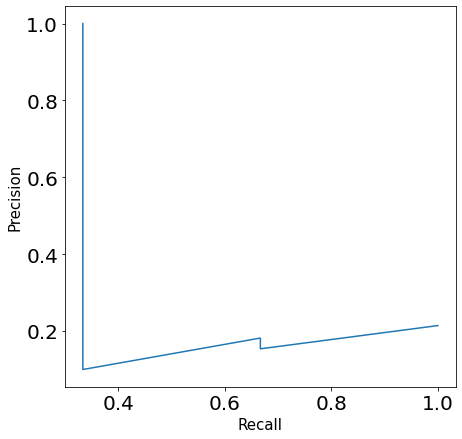

In [28]:
# NOTE: this code is written in a jupyter notebook
# import scikit-learn tree and metrics
from sklearn import tree
from sklearn import metrics
# import matplotlib and seaborn
# for plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# this is our global size of label text
# on the plots
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
# This line ensures that the plot is displayed
# inside the notebook
%matplotlib inline
precisions = []
recalls = []
# how we assumed these thresholds is a long story
thresholds = [0.0490937 , 0.05934905, 0.079377,
0.08584789, 0.11114267, 0.11639273,
0.15952202, 0.17554844, 0.18521942,
0.27259048, 0.31620708, 0.33056815,
0.39095342, 0.61977213]
# for every threshold, calculate predictions in binary
# and append calculated precisions and recalls
# to their respective lists
for i in thresholds:
  temp_prediction = [1 if x >= i else 0 for x in y_pred]
  p = precision(y_true, temp_prediction)
  r = recall(y_true, temp_prediction)
  precisions.append(p)
  recalls.append(r)

#Now, we can plot these values of precisions and recalls.

plt.figure(figsize=(7, 7))
plt.plot(recalls, precisions)
plt.xlabel('Recall', fontsize=15)
plt.ylabel('Precision', fontsize=15)

#This precision-recall curve looks very different from what you might have seen on the internet. It’s because we had only 20 samples, and only 3 of them were positive samples. But there’s nothing to worry. It’s the same old precision-recall curve.

#Both precision and recall range from 0 to 1 and a value closer to 1 is better.
#F1 score is a metric that combines both precision and recall. It is defined as a simple weighted average (harmonic mean) of precision and recall. If we denote precisionusing P and recall using R, we can represent 
#the F1 score as: F1 = 2PR / (P + R)

In [29]:
def f1(y_true, y_pred):
  """
  Function to calculate f1 score
  :param y_true: list of true values
  :param y_pred: list of predicted values
  :return: f1 score
  """
  p = precision(y_true, y_pred)
  r = recall(y_true, y_pred)
  score = 2 * p * r / (p + r)
  return score

#Let’s see the results of this and compare it with scikit-learn.

In [31]:
from sklearn import metrics
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0,1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_pred = [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
f1(y_true, y_pred),metrics.f1_score(y_true,y_pred)

(0.5714285714285715, 0.5714285714285715)

#Instead of looking at precision and recall individually, you can also just look at F1 score. Same as for precision, recall and accuracy, F1 score also ranges from 0 to 1, and a perfect prediction model has an F1 of 1. When dealing with datasets that have skewed targets, we should look at F1 (or precision and recall) instead of accuracy.

#The first one is TPR or True Positive Rate, which is the same as recall.
#TPR = TP / (TP + FN)
#Even though it is same as recall, we will make a python function for it for further use with this name.
#TPR or recall is also known as sensitivity.

In [34]:
def tpr(y_true, y_pred):
  """
  Function to calculate tpr
  :param y_true: list of true values
  :param y_pred: list of predicted values
  :return: tpr/recall
  """
  return recall(y_true, y_pred)

#And FPR or False Positive Rate, which is defined as:
#FPR = FP / (TN + FP)

In [32]:
def fpr(y_true, y_pred):
  """
  Function to calculate fpr
  :param y_true: list of true values
  :param y_pred: list of predicted values
  :return: fpr
  """
  fp = false_positive(y_true, y_pred)
  tn = true_negative(y_true, y_pred)
  return fp / (tn + fp)

#And 1 - FPR is known as specificity or True Negative Rate or TNR.
#These are a lot of terms, but the most important ones out of these are only TPR and FPR.

#Let’s calculate only two values, though: TPR and FPR.

In [35]:
# empty lists to store tpr
# and fpr values
tpr_list = []
fpr_list = []
# actual targets
y_true = [0, 0, 0, 0, 1, 0, 1,
0, 0, 1, 0, 1, 0, 0, 1]
# predicted probabilities of a sample being 1
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
0.85, 0.15, 0.99]
# handmade thresholds
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5,
0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]
# loop over all thresholds
for thresh in thresholds:
  # calculate predictions for a given threshold
  temp_pred = [1 if x >= thresh else 0 for x in y_pred]
  # calculate tpr
  temp_tpr = tpr(y_true, temp_pred)
  # calculate fpr
  temp_fpr = fpr(y_true, temp_pred)
  # append tpr and fpr to lists
  tpr_list.append(temp_tpr)
  fpr_list.append(temp_fpr)

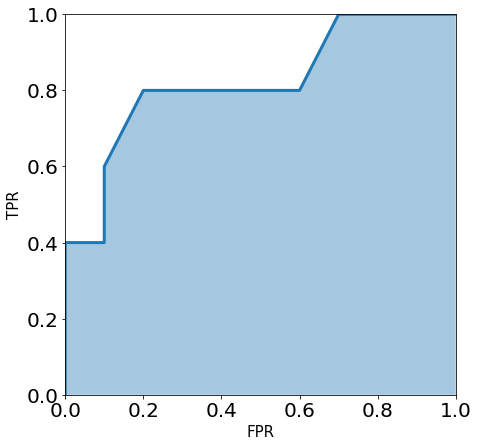

In [36]:
plt.figure(figsize=(7, 7))
plt.fill_between(fpr_list, tpr_list, alpha=0.4)
plt.plot(fpr_list, tpr_list, lw=3)
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.show()

#This curve is also known as the Receiver Operating Characteristic (ROC). And if we calculate the area under this ROC curve, we are calculating another metric which is used very often when you have a dataset which has skewed binary targets.
#This metric is known as the Area Under ROC Curve or Area Under Curve or just simply AUC. There are many ways to calculate the area under the ROC curve.
#or this particular purpose, we will stick to the fantastic implementation by scikitlearn.

In [37]:
from sklearn import metrics
metrics.roc_auc_score(y_true, y_pred)

0.8300000000000001

#But what does AUC say about our model?
##Now you get an AUC of 0.83 when you build a model to detect pneumothorax from chest x-ray images. This means that if you select a random image from your dataset with pneumothorax (positive sample) and another random image without pneumothorax (negative sample), then the pneumothorax image will rank higher than a non-pneumothorax image with a probability of 0.83.

#AUC is a widely used metric for skewed binary classification tasks in the industry,and a metric everyone should know about. Once you understand the idea behind AUC, as explained in the paragraphs above, it is also easy to explain it to nontechnical people who would probably be assessing your models in the industry.
#Another important metric you should learn after learning AUC is log loss. In case of a binary classification problem, we define log loss as:
#Log Loss = - 1.0 * ( target * log(prediction) + (1 - target) * log(1 - prediction) )
#Where target is either 0 or 1 and prediction is a probability of a sample belongingto class 1.

#For multiple samples in the dataset, the log-loss over all samples is a mere average of all individual log losses. 
#One thing to remember is that log loss penalizes quite high for an incorrect or a far-off prediction, i.e. log loss punishes you for being very sure and very wrong.

In [39]:
import numpy as np
def log_loss(y_true, y_proba):
  """
  Function to calculate log_loss
  :param y_true: list of true values
  :param y_proba: list of probabilities for 1
  :return: overall log loss
  """
  # define an epsilon value
  # this can also be an input
  # this value is used to clip probabilities
  epsilon = 1e-15
  # initialize empty list to store
  # individual losses
  loss = []
  # loop over all true and predicted probability values
  for yt, yp in zip(y_true, y_proba):
    # adjust probability
    # 0 gets converted to 1e-15
    # 1 gets converted to 1-1e-15
    # Why? Think about it!
    yp = np.clip(yp, epsilon, 1 - epsilon)
    # calculate loss for one sample
    temp_loss = - 1.0 * (
    yt * np.log(yp)
    + (1 - yt) * np.log(1 - yp)
    )
    # add to loss list
    loss.append(temp_loss)
    # return mean loss over all samples
  return np.mean(loss)

#Let’s test our implementation and compare with scikit-learn:

In [42]:
y_true = [0, 0, 0, 0, 1, 0, 1,0, 0, 1, 0, 1, 0, 0, 1]
y_proba = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,0.9, 0.5, 0.3, 0.66, 0.3, 0.2,0.85, 0.15, 0.99]
log_loss(y_true, y_proba),metrics.log_loss(y_true, y_proba)

(0.49882711861432294, 0.49882711861432294)

#Implementation of log loss is easy.
#Interpretation may seem a bit difficult. You must remember that log loss penalizes a lot more than other metrics.
#For example, if you are 51% sure about a sample belonging to class 1, log losswould be:

In [48]:
-1.0 *(1 * np.log(0.51) + (1-1) * np.log(1 -0.51))  #= 0.67

0.6733445532637656

#And if you are 49% sure for a sample belonging to class 0, log loss would be:

In [49]:
-1.0 *(0 * np.log(0.49) + (1-0) * np.log(1 -0.49))  #= 0.67

0.6733445532637656

#So, even though we can choose a cut off at 0.5 and get perfect predictions, we willstill have a very high log loss. So, when dealing with log loss, you need to be very careful; any non-confident prediction will have a very high log loss.

#Most of the time, the top-left value on ROC curve should give you a quite good threshold

#This seems complicated but is easy to understand by python implementations. Let’ssee how macro-averaged precision is implemented.

In [50]:
import numpy as np
def macro_precision(y_true, y_pred):
  """
  Function to calculate macro averaged precision
  :param y_true: list of true values
  :param y_proba: list of predicted values
  :return: macro precision score
  """
  # find the number of classes by taking
  # length of unique values in true list
  num_classes = len(np.unique(y_true))
  # initialize precision to 0
  precision = 0
  # loop over all classes
  for class_ in range(num_classes):
    # all classes except current are considered negative
    temp_true = [1 if p == class_ else 0 for p in y_true]
    temp_pred = [1 if p == class_ else 0 for p in y_pred]
    # calculate true positive for current class
    tp = true_positive(temp_true, temp_pred)
    # calculate false positive for current class
    fp = false_positive(temp_true, temp_pred)
    # calculate precision for current class
    temp_precision = tp / (tp + fp)
    # keep adding precision for all classes
    precision += temp_precision
  # calculate and return average precision over all classes
  precision /= num_classes
  return precision

#You will notice that it wasn’t so difficult. Similarly, we have micro-averaged precision score.

In [51]:
def micro_precision(y_true, y_pred):
  """
  Function to calculate micro averaged precision
  :param y_true: list of true values
  :param y_proba: list of predicted values
  :return: micro precision score
  """
  # find the number of classes by taking
  # length of unique values in true list
  num_classes = len(np.unique(y_true))
  # initialize tp and fp to 0
  tp = 0
  fp = 0
  # loop over all classes
  for class_ in range(num_classes):
    # all classes except current are considered negative
    temp_true = [1 if p == class_ else 0 for p in y_true]
    temp_pred = [1 if p == class_ else 0 for p in y_pred]
    # calculate true positive for current class
    # and update overall tp
    tp += true_positive(temp_true, temp_pred)
    # calculate false positive for current class
    # and update overall tp
    fp += false_positive(temp_true, temp_pred)
  # calculate and return overall precision
  precision = tp / (tp + fp)
  return precision

#This isn’t difficult, either. Then what is? Nothing. Machine learning is easy.
#Now, let’s look at the implementation of weighted precision

In [57]:
from collections import Counter
import numpy as np
def weighted_precision(y_true, y_pred):
  """
  Function to calculate weighted averaged precision
  :param y_true: list of true values
  :param y_proba: list of predicted values
  :return: weighted precision score
  """
  # find the number of classes by taking
  # length of unique values in true list
  num_classes = len(np.unique(y_true))
  # create class:sample count dictionary
  # it looks something like this:
  # {0: 20, 1:15, 2:21}
  class_counts = Counter(y_true)
  # initialize precision to 0
  precision = 0
  # loop over all classes
  for class_ in range(num_classes):
    # all classes except current are considered negative
    temp_true = [1 if p == class_ else 0 for p in y_true]
    temp_pred = [1 if p == class_ else 0 for p in y_pred]
    # calculate tp and fp for class
    tp = true_positive(temp_true, temp_pred)
    fp = false_positive(temp_true, temp_pred)
    # calculate precision of class
    temp_precision = tp / (tp + fp)
    # multiply precision with count of samples in class
    weighted_precision = class_counts[class_] * temp_precision
    # add to overall precision
    precision += weighted_precision
  # calculate overall precision by dividing by
  # total number of samples
  overall_precision = precision / len(y_true)
  return overall_precision

#Let’s compare our implementations with scikit-learn to know if we implemented it right.

In [53]:
from sklearn import metrics
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]

In [54]:
macro_precision(y_true, y_pred),metrics.precision_score(y_true, y_pred, average="macro")

(0.3611111111111111, 0.3611111111111111)

In [55]:
micro_precision(y_true, y_pred),metrics.precision_score(y_true, y_pred, average="micro")

(0.4444444444444444, 0.4444444444444444)

In [58]:
weighted_precision(y_true, y_pred),metrics.precision_score(y_true, y_pred, average="weighted")

(0.39814814814814814, 0.39814814814814814)

In [59]:
class_counts = Counter(y_true)
class_counts

Counter({0: 3, 1: 2, 2: 4})

In [61]:
from collections import Counter
import numpy as np
def weighted_f1(y_true, y_pred):
  """
  Function to calculate weighted f1 score
  :param y_true: list of true values
  :param y_proba: list of predicted values
  :return: weighted f1 score
  """
  # find the number of classes by taking
  # length of unique values in true list
  num_classes = len(np.unique(y_true))
  # create class:sample count dictionary
  # it looks something like this:
  # {0: 20, 1:15, 2:21}
  class_counts = Counter(y_true)
  # initialize f1 to 0
  f1 = 0
  # loop over all classes
  for class_ in range(num_classes):
    # all classes except current are considered negative
    temp_true = [1 if p == class_ else 0 for p in y_true]
    temp_pred = [1 if p == class_ else 0 for p in y_pred]
    # calculate precision and recall for class
    p = precision(temp_true, temp_pred)
    r = recall(temp_true, temp_pred)
    # calculate f1 of class
    if p + r != 0:
      temp_f1 = 2 * p * r / (p + r)
    else:
      temp_f1 = 0
    # multiply f1 with count of samples in class
    weighted_f1 = class_counts[class_] * temp_f1
    # add to f1 precision
    f1 += weighted_f1
  # calculate overall F1 by dividing by
  # total number of samples
  overall_f1 = f1 / len(y_true)
  return overall_f1

In [62]:
weighted_f1(y_true, y_pred),metrics.f1_score(y_true, y_pred, average="weighted")

(0.41269841269841273, 0.41269841269841273)

In [64]:
def f1(y_true, y_pred):
  """
  Function to calculate f1 score
  :param y_true: list of true values
  :param y_pred: list of predicted values
  :return: f1 score
  """
  p = precision(y_true, y_pred)
  r = recall(y_true, y_pred)
  if p + r != 0:
    score = 2 * p * r / (p + r)
  else:
    score = 0
  return score

In [66]:
f1(y_true, y_pred)

ZeroDivisionError: ignored

In [65]:
f1(y_true, y_pred),metrics.f1_score(y_true, y_pred)

ZeroDivisionError: ignored

Text(0.5, 48.5, 'Predicted Labels')

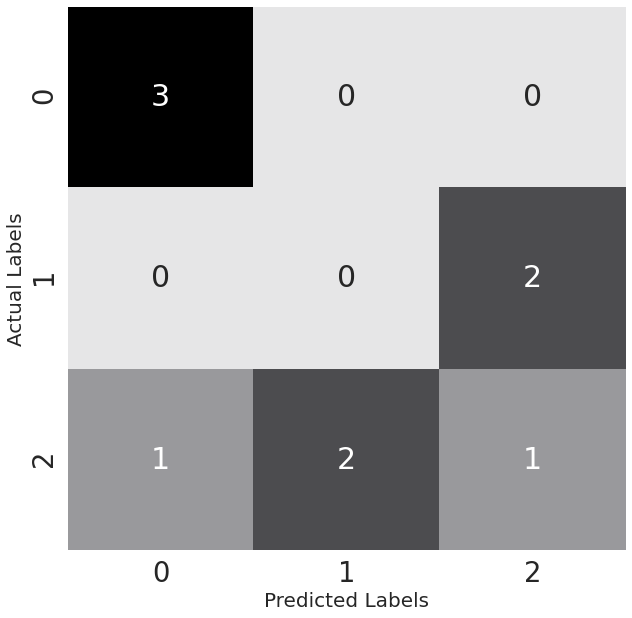

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
# some targets
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
#some predictions
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]
# get confusion matrix from sklearn
cm = metrics.confusion_matrix(y_true, y_pred)
# plot using matplotlib and seaborn
plt.figure(figsize=(10, 10))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0,
as_cmap=True)
sns.set(font_scale=2.5)
sns.heatmap(cm, annot=True, cmap=cmap, cbar=False)
plt.ylabel('Actual Labels', fontsize=20)
plt.xlabel('Predicted Labels', fontsize=20)

#Writing good, understandable code is an essential quality one can have, and many data scientists ignore it. 
#If you work on a project that others can understand and use without consulting you, you save their time and your own time and can invest that time to improve your project or work on a new one.